In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import pandas as pd
import shutil 
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

label_path = "./Desktop/AMLS/label.csv"
df = pd.read_csv("./Desktop/AMLS/label.csv")

path = "./Desktop/AMLS/image"
image_paths = list(paths.list_images(path))

images = []


#if not os.path.exists("./Desktop/AMLS/no_tumor"):
#    os.makedirs("./Desktop/AMLS/no_tumor")
#if not os.path.exists("./Desktop/AMLS/yes_tumor"):
#    os.makedirs("./Desktop/AMLS/yes_tumor")    
    
for image_path in image_paths:
    image = cv2.imread(image_path,0)
    images.append(image)


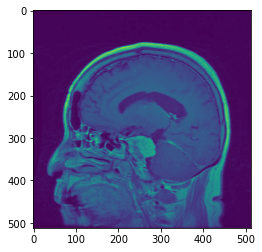

In [2]:
def plot_image(image):
    plt.imshow(image)
plot_image(images[0])
  

In [6]:
basedir = "./Desktop/AMLS"
images_dir = os.path.join(basedir,'image')
labels_filename = "label.csv"

image_paths = [os.path.join(images_dir, l) for l in os.listdir(images_dir)]
target_size = None
labels_file = open(os.path.join(basedir, labels_filename), 'r')
lines = labels_file.readlines()
tumor_labels = {line.split(',')[0] : (line.split(',')[1]) for line in lines[1:]}
#print(image_paths)
#trial_dict = {images,tumor_labels[1]}

#df = pd.DataFrame(tumor_labels)
#contain_values = df[df[1].str.contains('no_tumor')]
#print(contain_values)



In [18]:

for i in range(0, 3000):

    if "no_tumor" in (df.iat[i,1]): 
        shutil.copy(image_paths[i],"./Desktop/AMLS/no_tumor")
        
    else:
        shutil.copy(image_paths[i],"./Desktop/AMLS/yes_tumor")

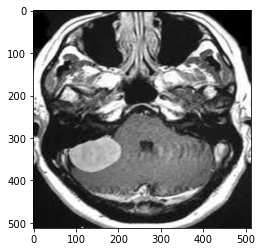

In [19]:
no_array = []
yes_array = []

for i in range(0, 3000):

    if "no_tumor" in (df.iat[i,1]): 
        no_array.append(images[i])
        
    else:
        yes_array.append(images[i])
        
plot_image(yes_array[25])

In [14]:
print(len(yes_array))
print(len(no_array))


ikiye ayır

2545
454


In [22]:
images=np.array(images)
images.shape

(3000, 512, 512)

In [5]:
Y = []
X = []
#images=np.array(images)

for i in range(0, 3000):
    
    if "no_tumor" in (df.iat[i,1]): 
        Y.append(0)
        X.append(images[i])
    else:
        Y.append(1)
        X.append(images[i])

X=np.array(X)
X = X.reshape(len(X),-1)
#X=np.array(X)
#Y=np.array(Y)

X.shape

(3000, 262144)

In [6]:
X, Y = shuffle(X,Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)


In [7]:
X.shape

(3000, 262144)

In [9]:
def SVM(x_train,y_train, x_test):
    model = SVC(kernel='linear')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred

y_pred=SVM(x_train,y_train, x_test)
print(accuracy_score(y_test,y_pred))


0.9383333333333334
